# Setup

In [1]:
import sys
sys.path.insert(
    0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [2]:
import sys
sys.path.insert(0, '/home/563/esh563/TINT')

In [3]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import caine_func as caf
import analysis
import tempfile #used to create temporary folders to store data

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF
%aimport tint.process_ACCESS
%aimport tint.process_operational_radar

%pdb


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/graphml.py:346: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  (np.int, "int"), (np.int8, "int"),
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/networkx/readwrite/gexf.py:220: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to us

Automatic pdb calling has been turned ON


In [4]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [5]:
base_dir = '/g/data/hj10/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/'
save_dir = '/home/563/esh563/TINT_tracks/'
fig_dir = '/home/563/esh563/TINT_figures/'
ERA5_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/'

# Create Tracks

In [5]:
b_path = '/home/student.unimelb.edu.au/shorte1/Documents/'
b_path += 'CPOL_analysis/circ_b_ind_set.pkl'
with open(b_path, 'rb') as f:
    b_ind_set = pickle.load(f)

In [33]:
datetimes = np.loadtxt(
    'ACCESS_radar_common_times.csv', dtype=str).astype(np.datetime64)

In [6]:
start = np.datetime64('2005-12-02T00:00:00')
end = np.datetime64('2005-12-03T00:00:00')
datetimes = np.arange(start, end, np.timedelta64(10,'m'))

In [12]:
# start = np.datetime64('2021-10-01T00:00:00')
# end = np.datetime64('2022-05-01T00:00:00')
# datetimes = np.arange(start, end, np.timedelta64(10,'m'))

micro_physics = 'operational'

tracks_obj = tint.Tracks(params={
    'GS_ALT': 1000,
    'LEVELS': np.array(
        [[1000, 1500], [500, 20000]]),
    'WIND_LEVELS': np.array(
        [[500, 3500], [500, 20000]]),
    'FIELD_THRESH': ['convective', 15],
    'MIN_SIZE': [80, 800],
    'ISO_THRESH': [10, 10],
    'AMBIENT': 'ERA5',
    'AMBIENT_BASE_DIR': ERA5_dir,
    'AMBIENT_TIMESTEP': 6,
    'SAVE_DIR': save_dir,
    'RESET_NEW_DAY': True,
    'REFERENCE_GRID_FORMAT': 'ODIM',
    'INPUT_TYPE': 'OPER_DATETIMES',
    'REFERENCE_RADAR': 63})

grids = (
    date for date in datetimes)

Creating a reference grid.


In [ ]:
tracks_obj.get_tracks(grids, b_path=b_path)

Retrieving files. Please wait.
Removing old radar files.
Extracting radar data for 2005-12-02T00:00:00.
Getting ERA5 metadata.
Restricting ERA5 data to 6 hour timestep
Getting interpolated ERA5 for next 6 hours.
No objects found in scan 0.
No objects found in scan 1.
No objects found in scan 2.
No objects found in scan 3.
No objects found in scan 4.
No objects found in scan 5.
No objects found in scan 6.
No objects found in scan 7.
No objects found in scan 8.
No objects found in scan 9.


/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/numba/core/consts.py:114: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return getattr(value, expr.attr)
/home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/numba/core/ir_utils.py:2097: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int

No objects found in scan 10.
No objects found in scan 11.
No objects found in scan 12.
No objects found in scan 13.
No objects found in scan 14.
No objects found in scan 15.
No objects found in scan 16.
No objects found in scan 17.
No objects found in scan 18.
No objects found in scan 19.
No objects found in scan 20.
No objects found in scan 21.
No objects found in scan 22.
No objects found in scan 23.
No objects found in scan 24.
Writing tracks for scan 25.
No objects found in scan 26.
No objects found in scan 27.
No objects found in scan 28.
Writing tracks for scan 29.
No objects found in scan 30.
No objects found in scan 31.
Writing tracks for scan 32.
No objects found in scan 33.
No objects found in scan 34.
No objects found in scan 35.
No objects found in scan 36.
No objects found in scan 37.
No objects found in scan 38.
No objects found in scan 39.
No objects found in scan 40.
Getting interpolated ERA5 for next 6 hours.
Writing tracks for scan 41.
Writing tracks for scan 42.
Writ

In [14]:
current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")
out_file_name = save_dir + '2020_2021_{}.pkl'.format(
    micro_physics, current_time)
with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)

In [15]:
tracks_obj = tint.objects.classify_tracks(tracks_obj)
tracks_obj = tint.objects.get_exclusion_categories(tracks_obj)

In [7]:
exclusions = [
    'small_area', 'large_area', 'intersect_border', 
    'intersect_border_convective', 'duration_cond', 
    'small_velocity', 'small_offset']

excluded = tracks_obj.exclusions[exclusions]
excluded = excluded.xs(0, level='level')
excluded = np.any(excluded, 1)
# excluded = excluded.where(excluded==False).dropna()
# len(excluded)/3

included = np.logical_not(excluded)
included = included.where(included==True).dropna()

In [8]:
included

scan  time                 uid
1001  2020-10-07 22:50:00  64     True
1002  2020-10-07 23:00:00  64     True
1003  2020-10-07 23:10:00  64     True
1004  2020-10-07 23:20:00  64     True
2912  2020-10-21 05:20:00  153    True
2917  2020-10-21 06:10:00  153    True
2918  2020-10-21 06:20:00  153    True
2919  2020-10-21 06:30:00  153    True
2922  2020-10-21 07:00:00  153    True
2923  2020-10-21 07:10:00  153    True
2924  2020-10-21 07:20:00  153    True
2925  2020-10-21 07:30:00  153    True
2926  2020-10-21 07:40:00  153    True
2928  2020-10-21 08:00:00  153    True
2930  2020-10-21 08:20:00  153    True
2931  2020-10-21 08:30:00  153    True
2932  2020-10-21 08:40:00  153    True
3496  2020-10-25 06:40:00  179    True
3499  2020-10-25 07:10:00  179    True
3500  2020-10-25 07:20:00  179    True
3501  2020-10-25 07:30:00  179    True
3502  2020-10-25 07:40:00  179    True
3506  2020-10-25 08:20:00  179    True
3949  2020-10-28 10:10:00  225    True
3950  2020-10-28 10:20:00  225   

In [5]:
with open(save_dir + '/radar_63/63_2020_10.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

In [20]:
ACCESS_refl, grid = tint.process_ACCESS.init_ACCESS_C(plot_datetime, tracks_obj.reference_grid, gadi=False)

syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p></body></html>


No reflectivity data at 2020-10-16T13:30:00


syntax error, unexpected WORD_WORD, expecting SCAN_ATTR or SCAN_DATASET or SCAN_ERROR
context: <!DOCTYPE^ HTML PUBLIC "-//IETF//DTD HTML 2.0//EN"><html><head><title>503 Service Unavailable</title></head><body><h1>Service Unavailable</h1><p>The server is temporarily unable to service yourrequest due to maintenance downtime or capacityproblems. Please try again later.</p></body></html>


OSError: [Errno -70] NetCDF: DAP server error: b'https://dapds00.nci.org.au/thredds/dodsC/wr45/ops_aps3/access-dn/1/20211210/1200/fcmm/sfc/maxcol_refl.nc'

> /home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/src/netCDF4/_netCDF4.pyx(1948)netCDF4._netCDF4._ensure_nc_success()

ipdb> u
> /home/student.unimelb.edu.au/shorte1/Documents/CPOL_analysis/src/netCDF4/_netCDF4.pyx(2330)netCDF4._netCDF4.Dataset.__init__()

ipdb> u
> /home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/xarray/backends/file_manager.py(205)_acquire_with_cache_info()
    203                     kwargs = kwargs.copy()
    204                     kwargs["mode"] = self._mode
--> 205                 file = self._opener(*self._args, **kwargs)
    206                 if self._mode == "w":
    207                     # ensure file doesn't get overriden when opened again

ipdb> u
> /home/student.unimelb.edu.au/shorte1/anaconda3/envs/CPOL_analysis/lib/python3.8/site-packages/xarray/backends/file_manager.py(187)acquire_context()
    185     def acquire_context(self, needs_lock=True):
    186         """Context manager for acquiri

ipdb> u
> /home/student.unimelb.edu.au/shorte1/Documents/TINT/tint/process_ACCESS.py(80)format_ACCESS_C()
     78         print('No reflectivity data at {}'.format(datetime))
     79         ref_date = '{:04d}{:02d}{:02d}'.format(2021, 12, 10)
---> 80         maxcol_refl = xr.open_dataset(
     81             base_dir + ref_date + '/1200/fcmm/sfc/maxcol_refl.nc')[
     82                 'maxcol_refl']

ipdb> q


In [29]:
tracks_obj.params['REMOTE'] = False
tracks_obj.params['SAVE_DIR'] = save_dir
grid, tracks_obj.file_list = tint.process_operational_radar.get_grid(
    np.datetime64('2020-10-21 06:30:00'), tracks_obj.params, 
    tracks_obj.reference_grid, tracks_obj.file_list)

Generating figure for 2020-10-21T06:30.


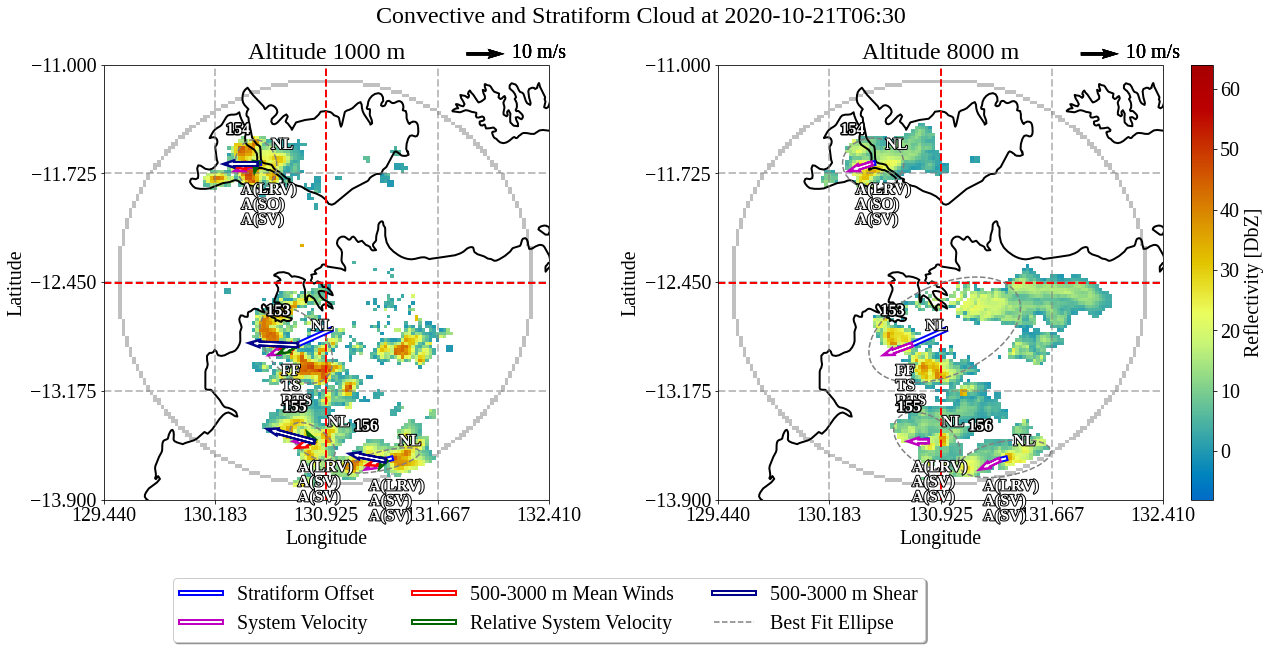

In [30]:
# filename = filenames[12]
# grid = pyart.io.read_grid(filename, include_fields=['reflectivity'])

# ACCESS_refl = tint.process_ACCESS.

current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")

params = {
    'uid_ind': None, 'line_coords': False, 'center_cell': False,
    'cell_ind': 10, 'winds': False,
    'crosshair': True, 'fontsize': 20, 'colorbar_flag': True,
    'leg_loc': 2, 'label_type': 'velocities',
    'system_winds': ['shift', 'ambient_mean', 'relative', 'shear'],
    'boundary': True, 'exclude': False}

tint.visualisation.figures.two_level(
    tracks_obj, grid, params=params, alt1=1000, alt2=8000)
plt.savefig(
    fig_dir + '/test_{}.png'.format(current_time), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')